In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create Path
path= r'/Users/shantamaraj/Desktop/INSTACART DATA'

In [6]:
#Import ords_prods_customer_merged pickle from Prepared Data folder
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'ords_prods_customer_merge.pkl'))

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
df.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,updated_busiest_days,busiest_period_of_day,first_name,last_name,gender,state,age,date_joined,n_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,NaN,Regularly busy,Regularly busy,Average orders,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,NaN,Regularly busy,Regularly busy,Average orders,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


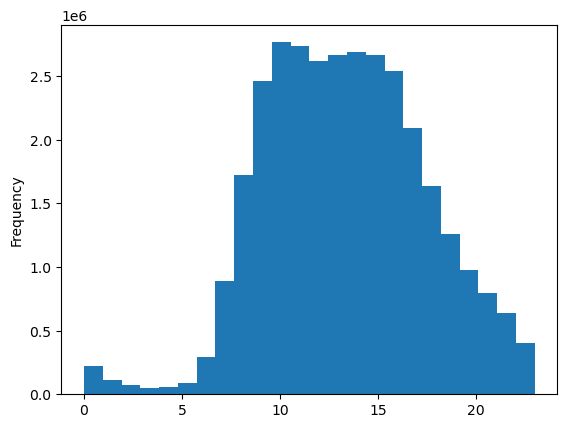

In [42]:
 #3 Create a histogram of the “order_hour_of_day” column.
hist = df['order_hour_of_day'].plot.hist(bins = 24)

In [41]:
### Distribution of Orders by Hour of Day

#This histogram displays the distribution of customer orders placed throughout the day. 

#The data shows that most orders occur between 9 AM and 5 PM , peak between 10 AM and 3 PM 
#This suggests that customers are most active during regular daytime hours

#There is minimal ordering activity during late night and early morning hours (midnight to 6 AM), which is consistent with expected user behavior. 

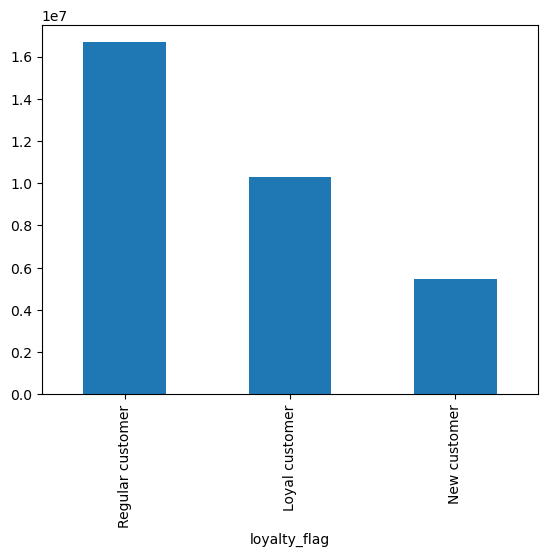

In [44]:
#4 Create a bar chart from the “loyalty_flag” column.
bar = df['loyalty_flag'].value_counts().plot.bar()

In [45]:
#5 Check “expenditure (price) by hour of day
#Create a sample set of the data
df_sample = df.sample(n=100000, random_state=1)

In [46]:
# Group by hour and calculate mean price
hourly_avg_prices = df_sample.groupby('order_hour_of_day')['prices'].mean().reset_index()

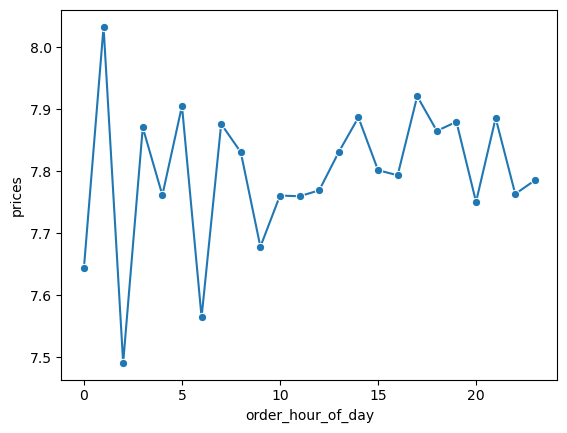

In [65]:
# Plot line chart
line_1= sns.lineplot(data=hourly_avg_prices, x='order_hour_of_day', y='prices', marker='o')

In [48]:
#6  Create Line Chart of Age vs. Number of Dependents

In [49]:
# Group by age and calculate average number of dependents
age_dependants = df.groupby('age')['n_dependants'].mean().reset_index()

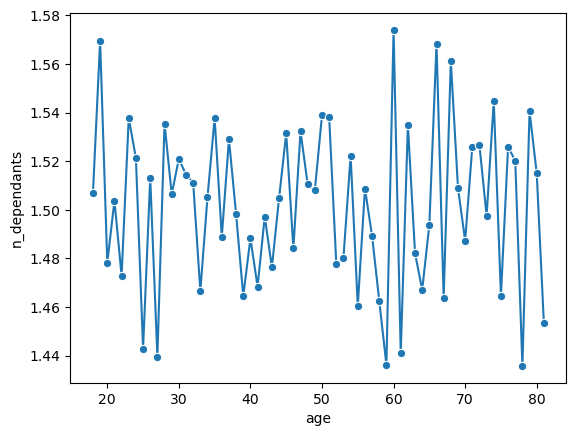

In [67]:
line_2= sns.lineplot(data=age_dependants, x='age', y='n_dependants', marker='o')

In [53]:
### Average Number of Dependents by Age Group

#This line chart shows the relationship between customer age groups and the average number of dependents.
#The number of dependents increases between ages 26–45, which likely reflects the life stage when many customers are raising children. 
#The number then gradually declines after age 55, but peaks again around 60

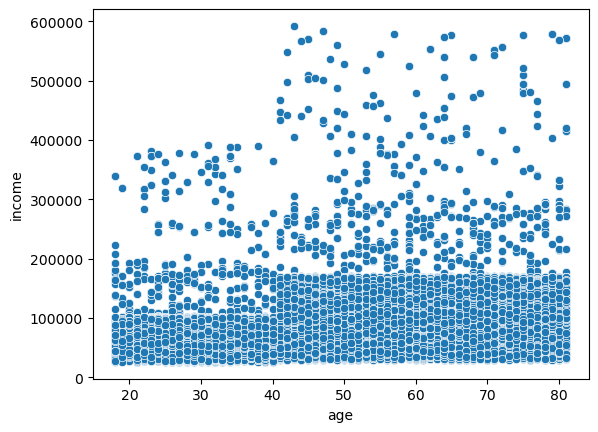

In [69]:
#7 Create Scatterplot of Age vs. Income
scat= sns.scatterplot(data=df_sample, x='age', y='income')

In [58]:
### Scatterplot Age vs. Income

#This scatterplot visualizes the relationship between customer age and annual income. 
#income is widely distributed across all age groups
#Most customers fall below the $150,000 income mark, forming a dense horizontal cluster. 
#This suggests that the majority of the customer base belongs to a middle-income segment.


In [59]:
# Export Vizulizations

In [61]:
hist.figure.savefig(os.path.join(path, 'Vizualizations', 'hist_order_hour_of_day.png'))

In [62]:
bar.figure.savefig(os.path.join(path, 'Vizualizations', 'bar_loyalty_flag.png'))

In [66]:
line_1.figure.savefig(os.path.join(path, 'Vizualizations', 'line_price_hour_of_day.png'))

In [68]:
line_2.figure.savefig(os.path.join(path, 'Vizualizations', 'line_no_of_dependents.png'))

In [70]:
scat.figure.savefig(os.path.join(path, 'Vizualizations', 'scat_age_income'))